## Name: Krina Bharatbhai Patel
## Net Id : vj3004

## Name: Fnu,Sharmila Bolikoppa Palakshappa
## Net Id : bm6575

## Group Id: 6
## Assignment 3


### Q1 [1pts] Create the following training datasets from the optdigits.tra set: 
#### X25: Randomly chosen N=25 instances from each class. 
#### X100:  Randomly chosen N=100 instances from each class. 


In [84]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn import metrics

from pandas import DataFrame, read_csv, to_numeric
from sklearn import cluster
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
import xgboost as xgb 
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.metrics import confusion_matrix,accuracy_score


df_train = read_csv('optdigits.tra',header=None)
df_test = read_csv('optdigits.tes',header=None)

X_25 = df_train.groupby(64).sample(25, random_state=1)
X_100 = df_train.groupby(64).sample(100, random_state=1)

In [85]:
df_train_X = df_train.drop(columns = df_train.columns[64])
df_train_y = df_train[df_train.columns[64]]

df_test_X = df_test.drop(columns = df_test.columns[64])
df_test_y = df_test[df_test.columns[64]]

X_25_X = X_25.drop(columns=df_train.columns[64])
X_25_y = X_25[df_train.columns[64]]

X_100_X = X_100.drop(columns=df_train.columns[64])
X_100_y = X_100[df_train.columns[64]]

### Q2 [2pts]: Decision Trees, classification: 
### Use library sklearn.tree.DecisionTreeClassifier algorithm. For the DecisionTreeClassifier determine the value of the tree depth parameter (experiment with depth=2, 3, 5, 10)  that results in the best test error. Report the training and test errors for each depth value and the training set. How does the best depth value change as the number of instances change? Note: Check the depth of the your trained decision tree, by e.g. plotting the tree.   


In [86]:
max_depth = [2,3,5,10]
for i in max_depth:
    classifier = DecisionTreeClassifier(max_depth=i)
    
    classifier.fit(X_25_X, X_25_y)
    predictions_X_25 = classifier.predict(X_25_X)
    X25_train_error = mean_squared_error(X_25_y,predictions_X_25)
    print("Training Error on X25 set : with Tree depth "+ str(i) + " is " '%.4f' % (X25_train_error))
    predictions_df_test = classifier.predict(df_test_X)
    X25_test_error = mean_squared_error(df_test_y,predictions_df_test)
    print("Test Error on X25 set : with Tree depth "+ str(i) + " is " '%.4f' % (X25_test_error))
    
    
    
    classifier.fit(X_100_X, X_100_y)
    predictions_X_100 = classifier.predict(X_100_X)
    X100_train_error = mean_squared_error(X_100_y,predictions_X_100)
    print("Training Error on X100 set : with Tree depth  "+ str(i) + " is " '%.4f' % (X100_train_error))
    prediction_df_test = classifier.predict(df_test_X)
    X100_test_error = mean_squared_error(df_test_y,prediction_df_test)
    print("Test Error on X100 set : with Tree depth "+ str(i) + " is " '%.4f' % (X100_test_error))    
    
    
    print(" ")
    
    

Training Error on X25 set : with Tree depth 2 is 6.0920
Test Error on X25 set : with Tree depth 2 is 6.5698
Training Error on X100 set : with Tree depth  2 is 7.6420
Test Error on X100 set : with Tree depth 2 is 7.6939
 
Training Error on X25 set : with Tree depth 3 is 4.5080
Test Error on X25 set : with Tree depth 3 is 6.9683
Training Error on X100 set : with Tree depth  3 is 9.4420
Test Error on X100 set : with Tree depth 3 is 9.2588
 
Training Error on X25 set : with Tree depth 5 is 2.7600
Test Error on X25 set : with Tree depth 5 is 6.8915
Training Error on X100 set : with Tree depth  5 is 3.9080
Test Error on X100 set : with Tree depth 5 is 5.3005
 
Training Error on X25 set : with Tree depth 10 is 0.0000
Test Error on X25 set : with Tree depth 10 is 5.6422
Training Error on X100 set : with Tree depth  10 is 0.1730
Test Error on X100 set : with Tree depth 10 is 4.1085
 


In [103]:
feature_cols = (X_25_X.columns)

(64,)


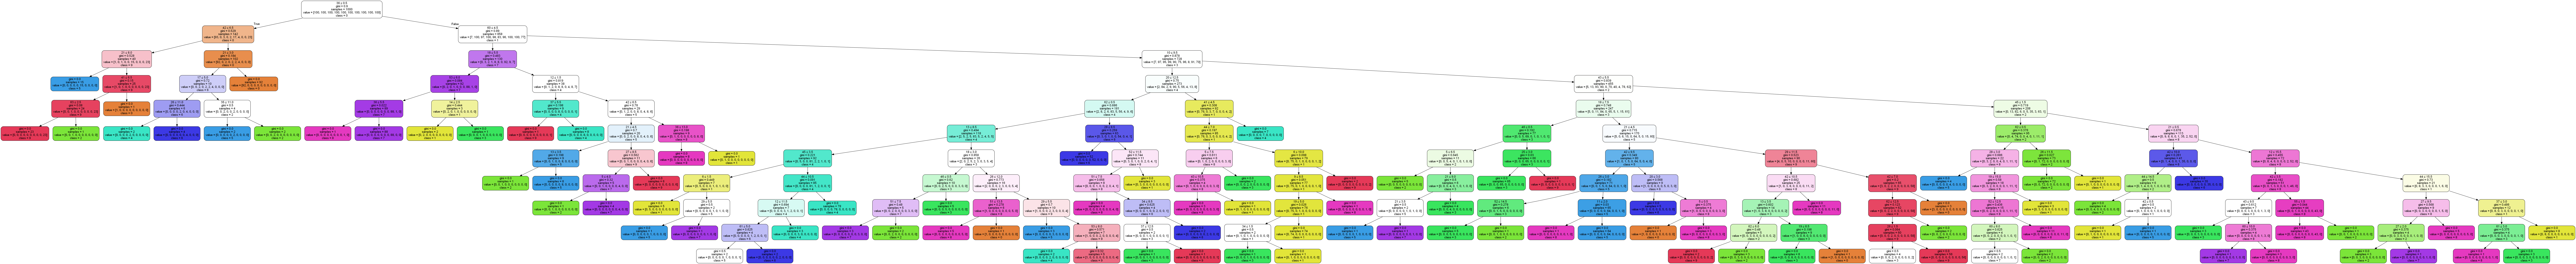

In [104]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8','9'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
feature_cols = (X_100_X.columns)

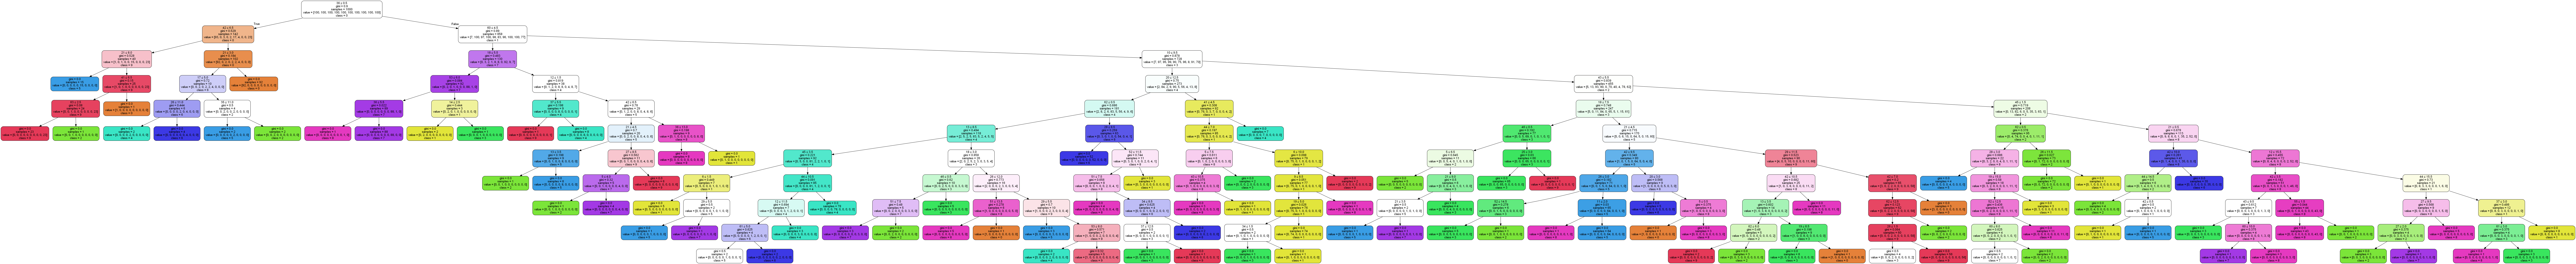

In [105]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8','9'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Repeat Q1 using XGBoost and LightGBM algorithms. Experiment with at least 5 different parameter settings to see their effect on training and test errors. How do best parameters change as the #training instances change?

## XGBoost Classifier

In [87]:
X25_X = X_25.drop(columns=df_train.columns[64])
X25_y = X_25[df_train.columns[64]]

## For X_25 Training Set

In [88]:
model = xgb.XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')
grid = RandomizedSearchCV(model,
                          {'max_depth': [2,5,7,10],
                          'learning_rate': [0.1,0.5],
                           'min_child_weight': [5,10,15],
                           'reg_lambda': [1.2, 1.3]
                          }, return_train_score=False, n_iter=10, scoring="accuracy"
                         )
grid.fit(X25_X,X25_y)
df = pd.DataFrame(grid.cv_results_)
df[['param_learning_rate','param_max_depth', 'param_reg_lambda', 'param_min_child_weight' ,'mean_test_score']]

,param_learning_rate,param_max_depth,param_reg_lambda,param_min_child_weight,mean_test_score
0,0.1,10,1.2,15,0.864
1,0.1,10,1.2,10,0.852
2,0.1,5,1.3,10,0.852
3,0.1,7,1.2,10,0.852
4,0.1,2,1.2,10,0.852
5,0.5,7,1.3,10,0.864
6,0.5,5,1.2,10,0.880
7,0.5,10,1.2,5,0.880
8,0.5,7,1.2,10,0.880
9,0.5,10,1.2,10,0.880


In [89]:
cv_results = grid.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print("For Parameters: " + str(params) + " The Error is: " '%.4f' %((1-mean_score)*100))
    
print("\n")
print("Best Parameters are : " + str(grid.best_params_))

For Parameters: {'reg_lambda': 1.2, 'min_child_weight': 15, 'max_depth': 10, 'learning_rate': 0.1} The Error is: 13.6000
For Parameters: {'reg_lambda': 1.2, 'min_child_weight': 10, 'max_depth': 10, 'learning_rate': 0.1} The Error is: 14.8000
For Parameters: {'reg_lambda': 1.3, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.1} The Error is: 14.8000
For Parameters: {'reg_lambda': 1.2, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.1} The Error is: 14.8000
For Parameters: {'reg_lambda': 1.2, 'min_child_weight': 10, 'max_depth': 2, 'learning_rate': 0.1} The Error is: 14.8000
For Parameters: {'reg_lambda': 1.3, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.5} The Error is: 13.6000
For Parameters: {'reg_lambda': 1.2, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.5} The Error is: 12.0000
For Parameters: {'reg_lambda': 1.2, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.5} The Error is: 12.0000
For Parameters: {'reg_lambda': 1.2, 'm

## For X_100 Training Set

In [90]:
X100_X = X_100.drop(columns=df_train.columns[64])
X100_y = X_100[df_train.columns[64]]

In [91]:
grid.fit(X100_X,X100_y)
df = pd.DataFrame(grid.cv_results_)
df[['param_learning_rate','param_max_depth', 'param_reg_lambda', 'param_min_child_weight' ,'mean_test_score']]

,param_learning_rate,param_max_depth,param_reg_lambda,param_min_child_weight,mean_test_score
0,0.1,2,1.2,10,0.934
1,0.1,2,1.3,5,0.943
2,0.5,2,1.2,5,0.948
3,0.5,5,1.2,5,0.946
4,0.5,2,1.3,10,0.936
5,0.1,2,1.3,15,0.924
6,0.5,7,1.3,5,0.947
7,0.5,2,1.2,15,0.930
8,0.5,10,1.3,5,0.947
9,0.1,7,1.2,10,0.935


In [92]:
cv_results = grid.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print("For Parameters: " + str(params) + " The Error is: " '%.4f' %((1-mean_score)*100))
    
print("\n")
print("Best Parameters are : " + str(grid.best_params_))

For Parameters: {'reg_lambda': 1.2, 'min_child_weight': 10, 'max_depth': 2, 'learning_rate': 0.1} The Error is: 6.6000
For Parameters: {'reg_lambda': 1.3, 'min_child_weight': 5, 'max_depth': 2, 'learning_rate': 0.1} The Error is: 5.7000
For Parameters: {'reg_lambda': 1.2, 'min_child_weight': 5, 'max_depth': 2, 'learning_rate': 0.5} The Error is: 5.2000
For Parameters: {'reg_lambda': 1.2, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.5} The Error is: 5.4000
For Parameters: {'reg_lambda': 1.3, 'min_child_weight': 10, 'max_depth': 2, 'learning_rate': 0.5} The Error is: 6.4000
For Parameters: {'reg_lambda': 1.3, 'min_child_weight': 15, 'max_depth': 2, 'learning_rate': 0.1} The Error is: 7.6000
For Parameters: {'reg_lambda': 1.3, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.5} The Error is: 5.3000
For Parameters: {'reg_lambda': 1.2, 'min_child_weight': 15, 'max_depth': 2, 'learning_rate': 0.5} The Error is: 7.0000
For Parameters: {'reg_lambda': 1.3, 'min_child_weigh

## LightGBM Classifier

## For X_25 Training Set

In [93]:
model = lgb.LGBMClassifier()
grid = RandomizedSearchCV(model,
                          {'max_depth': [2,5,7,10],
                          'learning_rate': [0.1,0.5],
                           'num_leaves': [10,30,50],
                           'min_split_gain': [0.3, 0.4],
                          }, return_train_score=False, n_iter=10, scoring="accuracy"
                         )
grid.fit(X25_X,X25_y)
df = pd.DataFrame(grid.cv_results_)
df[['param_learning_rate','param_max_depth', 'param_num_leaves', 'param_min_split_gain' ,'mean_test_score']]

,param_learning_rate,param_max_depth,param_num_leaves,param_min_split_gain,mean_test_score
0,0.1,5,50,0.4,0.888
1,0.5,5,10,0.4,0.880
2,0.1,7,10,0.3,0.884
3,0.1,7,30,0.3,0.884
4,0.5,2,10,0.4,0.868
5,0.1,5,10,0.4,0.888
6,0.1,2,30,0.4,0.892
7,0.5,7,10,0.3,0.872
8,0.5,7,50,0.3,0.872
9,0.1,10,30,0.4,0.888


In [94]:
cv_results = grid.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print("For Parameters: " + str(params) + " The Error is: " '%.4f' %((1-mean_score)*100))
    
print("\n")
print("Best Parameters are : " + str(grid.best_params_))

For Parameters: {'num_leaves': 50, 'min_split_gain': 0.4, 'max_depth': 5, 'learning_rate': 0.1} The Error is: 11.2000
For Parameters: {'num_leaves': 10, 'min_split_gain': 0.4, 'max_depth': 5, 'learning_rate': 0.5} The Error is: 12.0000
For Parameters: {'num_leaves': 10, 'min_split_gain': 0.3, 'max_depth': 7, 'learning_rate': 0.1} The Error is: 11.6000
For Parameters: {'num_leaves': 30, 'min_split_gain': 0.3, 'max_depth': 7, 'learning_rate': 0.1} The Error is: 11.6000
For Parameters: {'num_leaves': 10, 'min_split_gain': 0.4, 'max_depth': 2, 'learning_rate': 0.5} The Error is: 13.2000
For Parameters: {'num_leaves': 10, 'min_split_gain': 0.4, 'max_depth': 5, 'learning_rate': 0.1} The Error is: 11.2000
For Parameters: {'num_leaves': 30, 'min_split_gain': 0.4, 'max_depth': 2, 'learning_rate': 0.1} The Error is: 10.8000
For Parameters: {'num_leaves': 10, 'min_split_gain': 0.3, 'max_depth': 7, 'learning_rate': 0.5} The Error is: 12.8000
For Parameters: {'num_leaves': 50, 'min_split_gain': 0.3

## For X_100 Training Set

In [95]:
grid.fit(X100_X,X100_y)
df = pd.DataFrame(grid.cv_results_)
df[['param_learning_rate','param_max_depth', 'param_num_leaves', 'param_min_split_gain' ,'mean_test_score']]

,param_learning_rate,param_max_depth,param_num_leaves,param_min_split_gain,mean_test_score
0,0.1,2,10,0.4,0.953
1,0.5,5,50,0.4,0.924
2,0.5,5,30,0.4,0.924
3,0.5,2,50,0.4,0.930
4,0.5,7,50,0.3,0.934
5,0.5,7,30,0.3,0.934
6,0.1,5,50,0.3,0.952
7,0.5,2,30,0.4,0.930
8,0.5,5,10,0.4,0.939
9,0.1,7,10,0.3,0.954


In [96]:
cv_results = grid.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print("For Parameters: " + str(params) + " The Error is: " '%.4f' %((1-mean_score)*100))
    
print("\n")
print("Best Parameters are : " + str(grid.best_params_))

For Parameters: {'num_leaves': 10, 'min_split_gain': 0.4, 'max_depth': 2, 'learning_rate': 0.1} The Error is: 4.7000
For Parameters: {'num_leaves': 50, 'min_split_gain': 0.4, 'max_depth': 5, 'learning_rate': 0.5} The Error is: 7.6000
For Parameters: {'num_leaves': 30, 'min_split_gain': 0.4, 'max_depth': 5, 'learning_rate': 0.5} The Error is: 7.6000
For Parameters: {'num_leaves': 50, 'min_split_gain': 0.4, 'max_depth': 2, 'learning_rate': 0.5} The Error is: 7.0000
For Parameters: {'num_leaves': 50, 'min_split_gain': 0.3, 'max_depth': 7, 'learning_rate': 0.5} The Error is: 6.6000
For Parameters: {'num_leaves': 30, 'min_split_gain': 0.3, 'max_depth': 7, 'learning_rate': 0.5} The Error is: 6.6000
For Parameters: {'num_leaves': 50, 'min_split_gain': 0.3, 'max_depth': 5, 'learning_rate': 0.1} The Error is: 4.8000
For Parameters: {'num_leaves': 30, 'min_split_gain': 0.4, 'max_depth': 2, 'learning_rate': 0.5} The Error is: 7.0000
For Parameters: {'num_leaves': 10, 'min_split_gain': 0.4, 'max_d

### As we can see, when the number of instances increases, the Error decreases. Also, the max_depth parameter is impacting the models majorly and as the number of instances increases, the required value of max_depth parameter decreases.

### Q4 [2pts]: Multilayer Perceptrons: classification 
### Use library sklearn.neural_network.MLPClassifier. For the neural network (MLP) determine the value of the best hidden_layer_sizes (experiment with 1 and 2 hidden layers and 2, 5, 10 hidden units in each layer) that results in the best test error for each of the training data sets you created. 


In [97]:
def mlp_classifier_1layer(df_train, df_test,x):
    x_train = df_train.drop([64], axis=1)
    y_train = df_train[64]
    x_test = df_test.drop([64], axis=1)
    y_test = df_test[64]
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(x,),random_state=1, max_iter=300).fit(x_train, y_train)
    return 1-mlp_classifier.score(x_test, y_test)

def mlp_classifier_2layer(df_train, df_test,x,y):
    x_train = df_train.drop([64], axis=1)
    y_train = df_train[64]
    x_test = df_test.drop([64], axis=1)
    y_test = df_test[64]
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(x,y),random_state=1, max_iter=300).fit(x_train, y_train)
    return 1-mlp_classifier.score(x_test, y_test)

# MLP model with 1 hidden layer
columns = ["No of neurons in Layer1","X_25", "X_100"]
temp_error_list = []
num_hidden_neurons = [2,5,10]
for n in num_hidden_neurons:
    temp_error_list.append([n,mlp_classifier_1layer(X_25, df_test,n),mlp_classifier_1layer(X_100, df_test,n)])
df_test_error = pd.DataFrame(temp_error_list, columns=columns)
display(df_test_error.style.set_properties(**{'text-align': 'center'}).hide_index())

# MLP model with 2 hidden layer
columns = ["No of neurons in Layer 1","No of neurons in Layer 2","X_25", "X_100"]
temp_error_list1 = []
list = [2,5,10]
for i in list:
    for j in list:
        temp_error_list1.append([i,j,mlp_classifier_2layer(X_25, df_test,i,j),mlp_classifier_2layer(X_100, df_test,i,j)])
df_test_error1 = pd.DataFrame(temp_error_list1, columns=columns)
display(df_test_error1.style.set_properties(**{'text-align': 'center'}).hide_index())



No of neurons in Layer1,X_25,X_100
2,0.885921,0.806344
5,0.471898,0.206455
10,0.206455,0.126322


No of neurons in Layer 1,No of neurons in Layer 2,X_25,X_100
2,2,0.691708,0.639399
2,5,0.700612,0.468559
2,10,0.710629,0.741792
5,2,0.585977,0.402894
5,5,0.584864,0.288815
5,10,0.357262,0.193656
10,2,0.765164,0.545353
10,5,0.407346,0.190317
10,10,0.188648,0.104619


### From the above tables we can see that for X_25 dataset we got best test error of 0.188648 when we used 10 neurons in "Layer 1" and 10 neurons in "Layer 2"
### For X_100 dataset also we got best test error of 0.104619 when we used 10 neurons in "Layer 1" and 10 neurons in "Layer 2"

### Q5 [3pts]: Regression for digit completion: regression
### Use library sklearn.neural_network.MLPRegressor
### Using only the data for class 6 and class 9 in X100 for training,  use the first 48 features as inputs and predict the next 16 features,  i.e. create a neural network with 16 outputs. Report the test error (use only the instances from classes 6 and 9).Which pixels are easier to predict?(Clarification, each of your models will have the same set of features, namely features 1…48.)


In [98]:
X100_C6 = df_train[(df_train[64] == 6)].sample(100, random_state = 1)
X100_C9 = df_train[(df_train[64] == 9)].sample(100, random_state = 1)
X100_C69_train = X100_C6.append(X100_C9)


X100_C69_test = df_test[(df_test[64] == 9) | (df_test[64] == 6)]

def mean_square_error_def(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

regression_value = MLPRegressor(random_state=1 , max_iter=500)

x_train = X100_C69_train.iloc[:,0:48].values
x_test = X100_C69_test.iloc[:,0:48].values

y_train = X100_C69_train.iloc[:,49:].values
y_test = X100_C69_test.iloc[:,49:].values

regression_value.fit(x_train, y_train)
y_pred_train = regression_value.predict(x_train)
y_pred = regression_value.predict(x_test)


## Testing and Trainings errors

In [99]:
print('Training Error value: ',mean_square_error_def(y_train, y_pred_train))
print('Testing Error value: ',mean_square_error_def(y_test, y_pred))

Training Error value:  1.627800410040578
Testing Error value:  2.653641460227717


## Which pixels are easier to predict?
### Below table shows the error for each pixel from feature 48 to 64

In [100]:
df_final = pd.DataFrame(np.mean((y_test - y_pred)**2, axis=0),index=range(48,64))
df_final.columns=["Pixel_error"]    
df_final.sort_values("Pixel_error")

,Pixel_error
56,0.274917
55,0.325706
62,0.699795
63,1.188363
54,1.438341
48,2.218152
57,3.083412
58,6.474280
53,8.495690
59,8.816406


#### From the above table we can see that Fetaure/Pixel 56,55,62 can be predicted easily as they appear in the corners of the image

Text(0.5, 1.0, 'Predicted image \n(bottom 2 rows are predicted)')

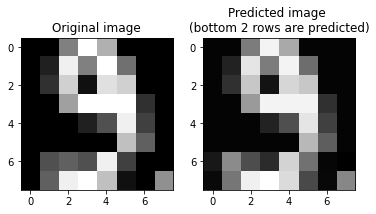

In [101]:
idx = 350
import matplotlib.pyplot as plt
x_orig = np.concatenate([x_test[idx], y_test[idx]]).reshape(8,8)
x_pred = np.concatenate([x_test[idx], y_pred[idx]]).reshape(8,8)
plt.subplot(1,2,1)
plt.imshow(x_orig, cmap='gray')
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(x_pred, cmap='gray')
plt.title('Predicted image \n(bottom 2 rows are predicted)')
